# Proyecto: Análisis de mercado inmobiliario

¡Bienvenido/a al primer proyecto de la carrera de Data Science de Acamica! 

El objetivo de este proyecto es reproducir los pasos que haría un/a Data Scientist cuando se enfrenta a una problemática real. Por eso, consta de tres secciones:
* En la Parte 1, te presentamos la problemática sobre la cual vas a trabajar. En esta sección deberás decidir qué datos te ayudarán a trabajar en este problema y dónde puedes conseguirlos.
* En la Parte 2 te proveemos de un dataset para abordar la problemática planteada. Deberás realizar un Análisis Exploratorio de Datos sobre este dataset.
* En la Parte 3, deberás utilizar herramientas de Machine Learning para predecir la variable de interés.


En este proyecto vas a trabajar con un dataset de propiedades en venta publicado en el portal [Properati](www.properati.com.ar).

## Problema

Recientemente te has incorporado al equipo de Datos de una gran inmobiliaria. La primera tarea que se te asigna es ayudar a los tasadores/as a valuar las propiedades, ya que es un proceso difícil y, a veces, subjetivo. Para ello, propones crear un modelo de Machine Learning que, dadas ciertas características de la propiedad, prediga su precio de venta.

### 1. Pensando como un/a Data Scientist

Responde la siguientes pregunta:
1. ¿Qué datos crees que te ayudarían a trabajar en el problema?¿Por qué?

**Importante**: NO deberás buscar esos datos, solamente justificar qué información crees que te ayudaría a resolver la problemática planteada.

***Para poder resolver esta problematica considero que me ayudaran a resolverla los atributos más importantes como superficie total, superficie cubierta, cantidad de habitaciones, cantidad de baños, cantidad de dormitorios y la ubicación del inmueble.***  

### 2. Análisis Exploratorio de Datos

En esta sección, debes realizar un Análisis Exploratorio de Datos sobre el dataset de propiedades de Properati. Es importante que respondas las siguientes preguntas durante el análisis:

* ¿Qué tamaño tiene el dataset?¿Cuántas instancias y cuántas columnas?
* ¿Cuántos valores faltantes hay en cada columna?
* ¿Cómo es la distribución de cada variable? Deberás hacer histogramas para las variables numéricas y gráficos de barras para las variables categóricas.
* ¿Cómo se relacionan las variables entre sí?¿Qué tipo de gráfico será conveniente para presentar esta información?
* ¿Cómo están correlacionadas las variables numéricas?¿Qué tipo de gráfico será conveniente para presentar esta información?¿Cuáles serán los mejores predictores de la variable de interés?

Vas a encontrar instrucciones para responder estas preguntas. Es importante aclarar que estas instrucciones corresponden al **mínimo entregable** que esperamos en la consigna.

**Comentarios sobre el dataset** 
1. Nosotros ya hicimos un *curado* sobre el dataset que puedes descargar directamente de la página de Properati. Muchos de los pasos que hicimos para curar el conjunto de datos los veremos durante el Bloque 2 de la carrera.

2. Si tienes dudas sobre qué representa alguna de las columnas, puedes consultar [aquí](https://www.properati.com.ar/data/). Notarás que algunas columnas fueron descartadas.

3. `Capital Federal` refiere a la Ciudad de Buenos Aires. `Bs.As. G.B.A. Zona Norte`, `Bs.As. G.B.A. Zona Sur` y `Bs.As. G.B.A. Zona Oeste` son regiones que conforman el [Gran Buenos Aires](https://es.wikipedia.org/wiki/Gran_Buenos_Aires), un conjunto de ciudades que rodean a la Ciudad de Buenos Aires.


#### 2.1 Desafío
En el dataset provisto hay mucha información, más allá del problema planteado. Propone una pregunta que pueda ser respondida por el dataset e intenta responderla.¿Cuáles son los sesgos de la respuesta obtenida?(¿Cuán generalizable es la respuesta obtenida?)¿Necesitas información complementaria?¿Cómo la obtendrías?

Por ejemplo: ¿Cuál es el barrio más caro de Buenos Aires? Probablemente puedas responder esta pregunta con este dataset. Pero podria ocurrir que la respuesta esté sesgada. ¿Cómo? Tal vez las propiedades más caras no se publican de forma online, sino que utilizan otro canal de venta.

# Desafio 

***¿Cuál es el barrio con las propiedades más baratas de Buenos Aires?***

0. Importa las librerías necesarias para trabajar en la consigna.

In [66]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

1. Carga el dataset usando las funcionalidades de Pandas. Imprimir cuántas filas y columnas tiene, y sus cinco primeras instancias.

In [67]:
data_properati = pd.read_csv("DS_Proyecto_01_Datos_Properati.csv")

In [68]:
data_properati.shape 

(146660, 19)

In [69]:
data_properati.head(5)

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
4,2019-10-17,2020-03-11,2019-10-17,-34.914194,-57.938219,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,USD,58 entre 1 y 2 Venta de departamento en ph.1 ...,58 entre 1 y 2 Venta de departamento en PH. P...,PH,Venta


2. **Valores Faltantes**: imprime en pantalla los nombres de las columnas y cuántos valores faltantes hay por columna.

In [70]:
data_properati.columns

Index(['start_date', 'end_date', 'created_on', 'lat', 'lon', 'l1', 'l2', 'l3',
       'rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered',
       'price', 'currency', 'title', 'description', 'property_type',
       'operation_type'],
      dtype='object')

In [71]:
data_properati.isna().sum()

start_date             0
end_date               0
created_on             0
lat                 9925
lon                 9959
l1                     0
l2                     0
l3                     0
rooms                  0
bedrooms               0
bathrooms           5957
surface_total      20527
surface_covered    21614
price                  0
currency               0
title                  0
description            0
property_type          0
operation_type         0
dtype: int64

In [72]:
data_properati["tipos de propiedades"] = data_properati.property_type
data_properati["superficie total"] = data_properati.surface_total
data_properati["superficie cubierta"] = data_properati.surface_covered 
data_properati["precios"] = data_properati.price 
data_properati["país"] = data_properati.l1
data_properati["región"] = data_properati.l2
data_properati["barrio"] = data_properati.l3
data_properati["habitaciones"] = data_properati.rooms
data_properati["baños"] = data_properati.bathrooms
data_properati["dormitorios"] = data_properati.bedrooms
data_properati["latitud"] = data_properati.lat
data_properati["longitud"] = data_properati.lon
data_properati["fecha de inicio"] = data_properati.start_date
data_properati["fecha de finalización"] = data_properati.end_date
data_properati["creación"] = data_properati.created_on
data_properati["moneda"] = data_properati.currency
data_properati["titulo"] = data_properati.title
data_properati["descripción"] = data_properati.description
data_properati["tipo de operación"] = data_properati.operation_type

In [73]:
data_prop = data_properati[['país','región','latitud','longitud','barrio','precios', 'habitaciones', 
                            'baños', 'dormitorios', 'superficie total', 'superficie cubierta', 'tipos de propiedades',
                           'fecha de inicio','fecha de finalización','creación','moneda','titulo','descripción','tipo de operación']]
data_prop.describe()

,latitud,longitud,precios,habitaciones,baños,dormitorios,superficie total,superficie cubierta
count,136735.000000,136701.000000,1.466600e+05,146660.000000,140703.000000,146660.000000,126133.000000,125046.000000
mean,-34.604896,-58.465304,2.412211e+05,3.079817,1.599994,1.983240,216.872888,112.818011
std,0.468428,0.486190,3.185195e+05,1.416352,0.889324,1.151304,2037.606649,916.857584
min,-35.318457,-180.000000,5.500000e+03,1.000000,1.000000,0.000000,10.000000,1.000000
25%,-34.627667,-58.504012,1.110000e+05,2.000000,1.000000,1.000000,52.000000,47.000000
50%,-34.600943,-58.443262,1.660000e+05,3.000000,1.000000,2.000000,78.000000,68.000000
75%,-34.574600,-58.407586,2.650000e+05,4.000000,2.000000,3.000000,140.000000,108.000000
max,85.051129,-57.805832,3.243423e+07,35.000000,14.000000,15.000000,193549.000000,126062.000000


3. **Tipos de propiedad**: ¿Cuántos tipos de propiedad hay publicados según este dataset?¿Cuántos instancias por cada tipo de propiedad hay en el dataset? Responde esta pregunta usando las funcionalidad de Pandas y con un gráfico apropiado de Seaborn. **Pistas**: Te puede ser útil googlear cómo rotar las etiquetas del eje x.

In [74]:
instancias_propiedades = data_prop['tipos de propiedades'].value_counts()
print(instancias_propiedades)

Departamento       107326
Casa                21521
PH                  14298
Lote                 1312
Oficina               658
Otro                  374
Local comercial       325
Casa de campo         322
Depósito              265
Cochera               259
Name: tipos de propiedades, dtype: int64


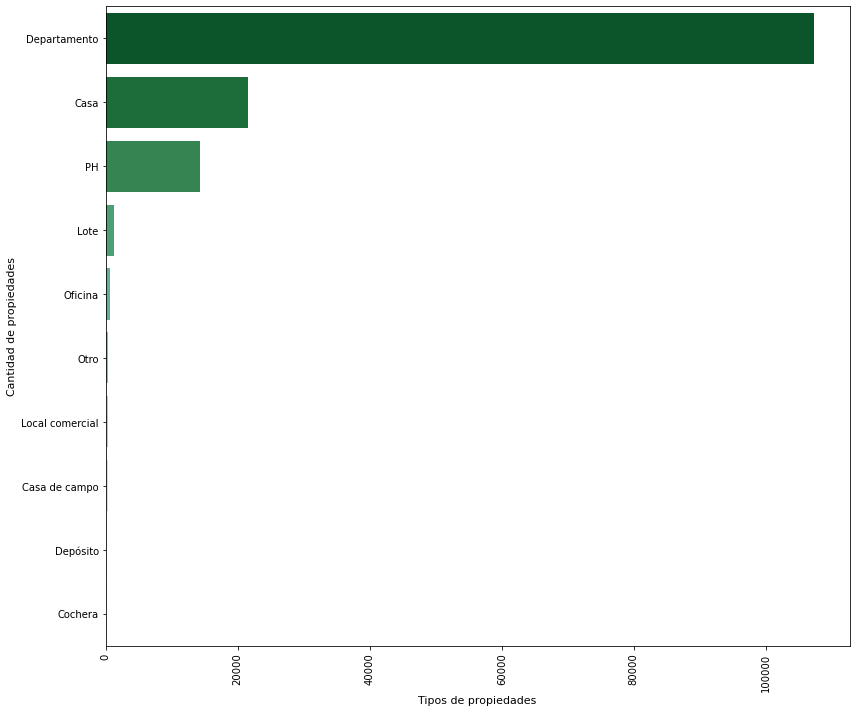

In [75]:
fig_00 = plt.figure(figsize=(12,10))
ax = sns.countplot(y = 'tipos de propiedades', data= data_prop, palette='BuGn_r',
                  order= data_properati['tipos de propiedades'].value_counts().index)
plt.ylabel('Cantidad de propiedades', fontsize=11);
plt.xlabel('Tipos de propiedades', fontsize=11);
for item in ax.get_xticklabels():
       item.set_rotation(90)

plt.tight_layout()
plt.show()

***En este gráfico se puede observar que en la ciudad de Buenos aires, el tipo de propiedad que más publicaciones tiene son los departamentos, seguidos de casas en segundo lugar y en tercer lugar se pueden encontrar los PH.***

4. ¿De qué regiones son las publicaciones? Haz gráficos de barras para las variables `l2` y `l3`. Si te animas, puedes hacer los dos gráficos usando `subplot` de Matplotlib. Dale un tamaño apropiado a la figura para que ambos gráficos se visualicen correctamente.

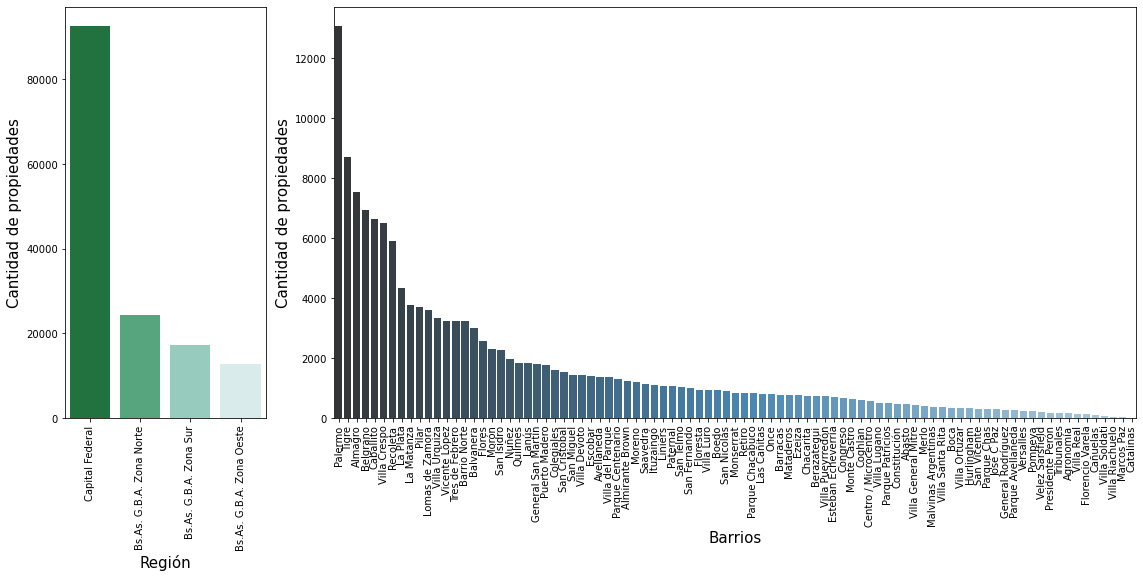

In [76]:
from matplotlib import gridspec
fig = plt.figure(figsize=(16,14))
gs = gridspec.GridSpec(2, 2, width_ratios=[1, 4])
plt.subplot(gs[0])
ax = sns.countplot(x = 'región', data= data_prop, palette = 'BuGn_r',
                  order= data_properati['región'].value_counts().index)
plt.ylabel('Cantidad de propiedades',fontsize=15);
plt.xlabel('Región',fontsize=15);
for item in ax.get_xticklabels():
       item.set_rotation(90)
plt.subplot(gs[1])
ax2 = sns.countplot(x = 'barrio', data= data_prop, palette= 'Blues_d',
                   order= data_properati['barrio'].value_counts().index)
plt.ylabel('Cantidad de propiedades', fontsize=15);
plt.xlabel('Barrios',fontsize=15);
for item in ax2.get_xticklabels():
       item.set_rotation(90)
plt.tight_layout()
plt.show()

***En este siguiente gráfico se puede observar que la mayor concentración de publicaciones se encuentra en Capital Federal. Esto tiene sentido ya que los barrios que tienen la mayor cantidad de publicaciones se encuentran en Capital Federal como por ejemplo Palermo, Almagro, Belgrano, Caballito, entre otros***.

5. **Filtrando el Dataset:** A partir de los resultados del punto 3. y 4., selecciona las tres clases más abundantes de tipos de propiedad y la región con más propiedades publicadas. Crea un nuevo Data Frame con aquellas instancias que cumplen con esas condiciones e imprime su `shape`.

In [77]:
data_filtrada = data_prop.loc[(data_prop.región == 'Capital Federal') & ((data_prop['tipos de propiedades'] == 'PH')|(data_prop['tipos de propiedades'] == 'Casa')|(data_prop['tipos de propiedades'] == 'Departamento'))]
data_filtrada.shape

(91485, 19)

**Checkpoint:** deberías tener un dataset con 91485 instacias, 19 columnas.

6. **Distribuciones y relaciones de a pares:** Estudia la distribución y las relaciones de a pares de las variables `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered`, `price` para cada tipo de propiedad. Para ello, ten en cuenta:
    1. Obtiene estadísticos que te sirvan para tener una primera idea de los valores que abarcan estas variables. ¿Cuáles crees que toman valores que tal vez no tengan mucho sentido?
    1. Algunas instancias tienen valores de superficie (`surface_total`) muy grandes y dificultan la correcta visualización. Estudia la distribución de esa variable y filtra por un valor razonable que te permita obtener gráficos comprensibles. Puede ser útil un boxplot para determinar un rango razonable.
    1. Lo mismo ocurre con valores de superficie total muy chico.
    1. Las propiedades no pueden tener `surface_covered` mayor a `surface_total`. Si eso sucede, debes filtrar esas instancias.
    1. El rango de precios que toman las propiedades es muy amplio. Estudia la distribución de esa variable y filtra por un valor razonable que te permita obtener gráficos comprensibles. Puede ser útil un boxplot para determinar un rango razonable.
    1. Una vez filtrado el dataset, puedes utilizar la función `pairplot` de Seaborn.

In [78]:
data_A = data_filtrada[['precios', 'habitaciones', 'baños', 'dormitorios', 'superficie total', 'superficie cubierta', 'tipos de propiedades']]
data_A.describe()

,precios,habitaciones,baños,dormitorios,superficie total,superficie cubierta
count,9.148500e+04,91485.000000,89314.000000,91485.000000,82568.000000,82250.000000
mean,2.595003e+05,2.964278,1.560147,1.960278,112.626369,94.966310
std,3.222654e+05,1.314704,0.860309,1.072946,980.713664,778.515243
min,6.000000e+03,1.000000,1.000000,0.000000,10.000000,1.000000
25%,1.200000e+05,2.000000,1.000000,1.000000,49.000000,44.000000
50%,1.750000e+05,3.000000,1.000000,2.000000,71.000000,63.000000
75%,2.790000e+05,4.000000,2.000000,3.000000,111.000000,96.000000
max,3.243423e+07,26.000000,14.000000,15.000000,126062.000000,126062.000000


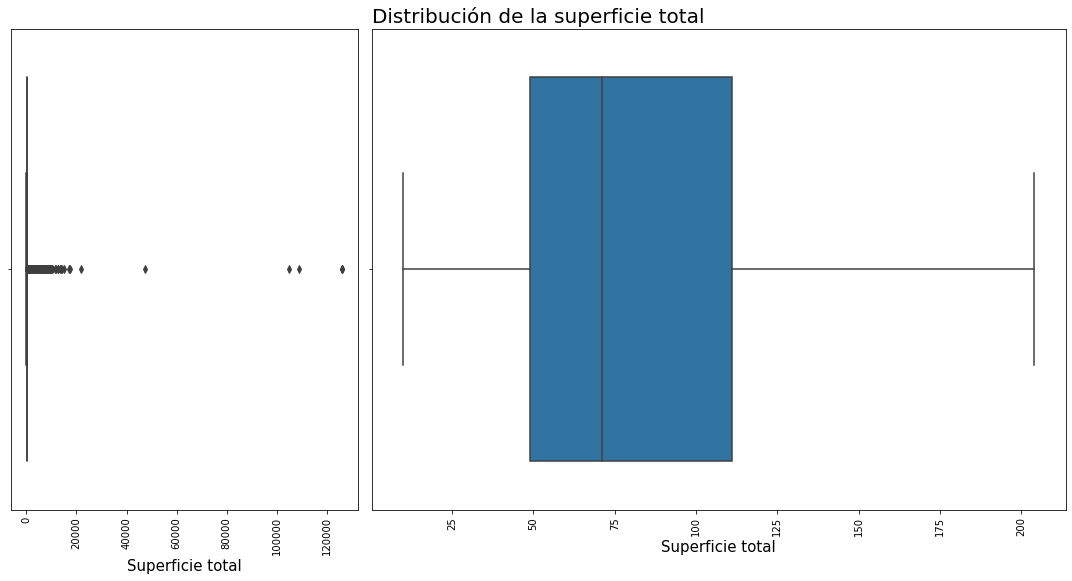

In [79]:
from matplotlib import gridspec
fig = plt.figure(figsize=(15,15))
gs = gridspec.GridSpec(2, 2, width_ratios=[1, 2])
plt.subplot(gs[0])
ax = sns.boxplot(data = data_A, x = "superficie total")
plt.xlabel('Superficie total', fontsize=15);
for item in ax.get_xticklabels():
       item.set_rotation(90)
plt.subplot(gs[1])
ax2 = sns.boxplot(data = data_A, x = "superficie total", showfliers = False)
plt.xlabel('Superficie total',fontsize=15);
plt.title("Distribución de la superficie total", fontsize=20, loc='left') 
for item in ax2.get_xticklabels():
       item.set_rotation(90)
plt.tight_layout()
plt.show()

***Conclusiones sobre los gráficos, ya podemos ver que tenemos outliers:***

Se pueden observar en el primer gráfico la presencia de outliers en ambos extremos que nos dificultan el correcto analisis del gráfico, es por eso que decidimos eliminar dichos outliers y pudimos realizar un mejor analisis de la superficie total en el segundo gráfico donde se puede identificar que en promedio los inmuebles poseen una superficie total que se encuentra entre 50mt2 y 110mt2.


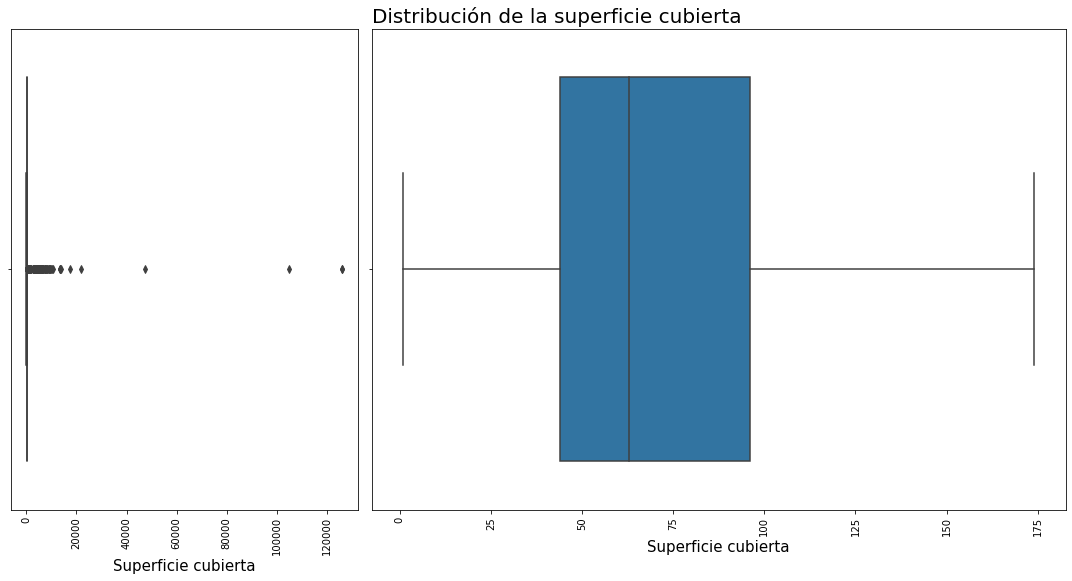

In [80]:
from matplotlib import gridspec
fig = plt.figure(figsize=(15,15))
gs = gridspec.GridSpec(2, 2, width_ratios=[1, 2])
plt.subplot(gs[0])
ax = sns.boxplot(data = data_A, x = "superficie cubierta")
plt.xlabel('Superficie cubierta', fontsize=15);
for item in ax.get_xticklabels():
       item.set_rotation(90)
plt.subplot(gs[1])
ax2 = sns.boxplot(data = data_A, x = "superficie cubierta", showfliers = False)
plt.xlabel('Superficie cubierta',fontsize=15);
plt.title("Distribución de la superficie cubierta", fontsize=20, loc='left') 
for item in ax2.get_xticklabels():
       item.set_rotation(90)
plt.tight_layout()
plt.show()

***Conclusiones sobre los gráficos, ya podemos ver que tenemos outliers:***

Se pueden observar en el primer gráfico la presencia de outliers en ambos extremos que nos dificultan el correcto analisis del gráfico, es por eso que decidimos eliminar dichos outliers y pudimos realizar un mejor analisis de la superficie cubierta en el segundo gráfico donde se puede identificar que en promedio los inmuebles poseen una superficie cubierta que se encuentra entre 40mt2 y 100mt2. Este resultado cobra sentido ya que la superficie cubierta siempre deberia ser menor a la superficie total.

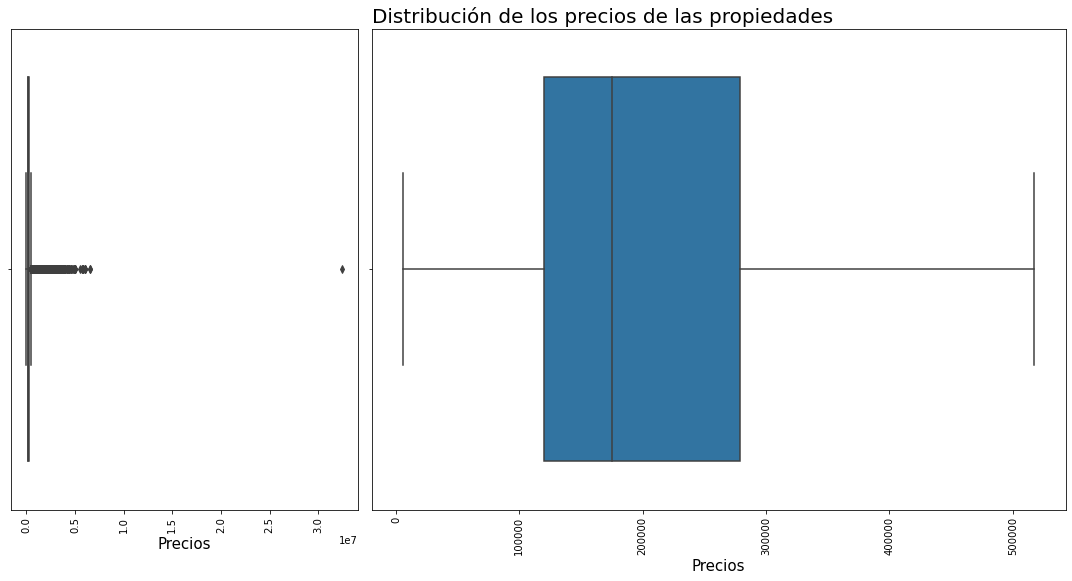

In [81]:
from matplotlib import gridspec
fig = plt.figure(figsize=(15,15))
gs = gridspec.GridSpec(2, 2, width_ratios=[1, 2])
plt.subplot(gs[0])
ax = sns.boxplot(data = data_A, x = "precios")
plt.xlabel('Precios', fontsize=15);
for item in ax.get_xticklabels():
       item.set_rotation(90)
plt.subplot(gs[1])
ax2 = sns.boxplot(data = data_A, x = "precios", showfliers = False)
plt.xlabel('Precios',fontsize=15);
plt.title("Distribución de los precios de las propiedades", fontsize=20, loc='left') 
for item in ax2.get_xticklabels():
       item.set_rotation(90)
plt.tight_layout()
plt.show()

***Conclusiones sobre los gráficos, ya podemos ver que tenemos outliers:***

Se pueden observar en el primer gráfico la presencia de outliers en ambos extremos que nos dificultan el correcto analisis del gráfico, dichos valores deben corresponder a inmuebles exclusivos de mayor prestigio que no tienen ninguna similitud con la mayoria de los inmuebles que existen en nuestro dataset, es por eso que decidimos eliminar dichos outliers y pudimos realizar un mejor analisis de los precios de los inmuebles en el segundo gráfico donde se pueden identificar que en promedio los inmuebles poseen valor que ronda entre los us$ 100.000 y los us$ 300.000

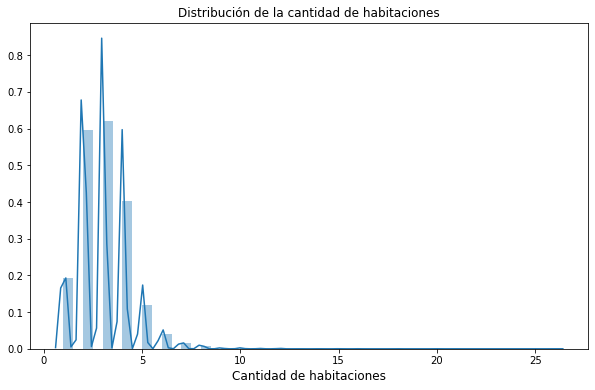

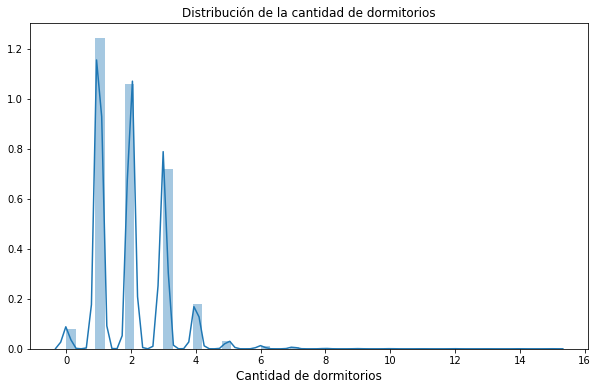

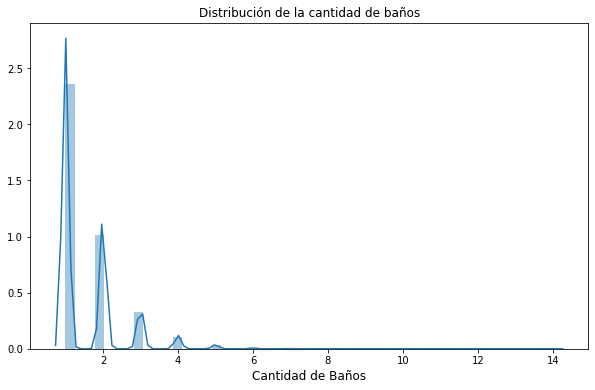

In [82]:
plt.figure(1, figsize=(10,6))
plt.title("Distribución de la cantidad de habitaciones",fontsize=12) 
sns.distplot(data_A["habitaciones"]) 
plt.xlabel('Cantidad de habitaciones',fontsize=12);

plt.figure(2, figsize=(10,6))
plt.title("Distribución de la cantidad de dormitorios",fontsize=12)
sns.distplot(data_A["dormitorios"])
plt.xlabel('Cantidad de dormitorios',fontsize=12);


plt.figure(3, figsize=(10,6))
plt.title("Distribución de la cantidad de baños",fontsize=12)
sns.distplot(data_A["baños"])
plt.xlabel('Cantidad de Baños',fontsize=12);


***Conclusiones sobre los últimos gráficos***

En estos gráficos de cantidad habitaciones y dormitorios pudimos observar que existen datos que se encuentran en 0, esto se debe a que existen monoambientes o ph en los cuales no existen subdivisiones dentro de la propiedad.
Por el lado de la cantidad de baños, el resultado encuentra sentido ya que todas las propiedades poseen 1 baño como minimo y no hay existencia de propiedades sin baño.

6. **Correlaciones:** Estudia la correlación entre las variables `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered`, `price`. ¿Cuáles son las mejores variables para predecir el precio?¿Qué diferencias encuentras según cada tipo de propiedad?

In [83]:
data_B = data_A.loc[(data_A['superficie total'] < 125) & (data_A['superficie total']>50)] 

In [84]:
data_C = data_B.loc[data_B['superficie total'] >= data_B['superficie cubierta']] 

In [85]:
data_D = data_C.loc[(data_C['precios'] < 300000) & (data_C['precios']>100000)] 

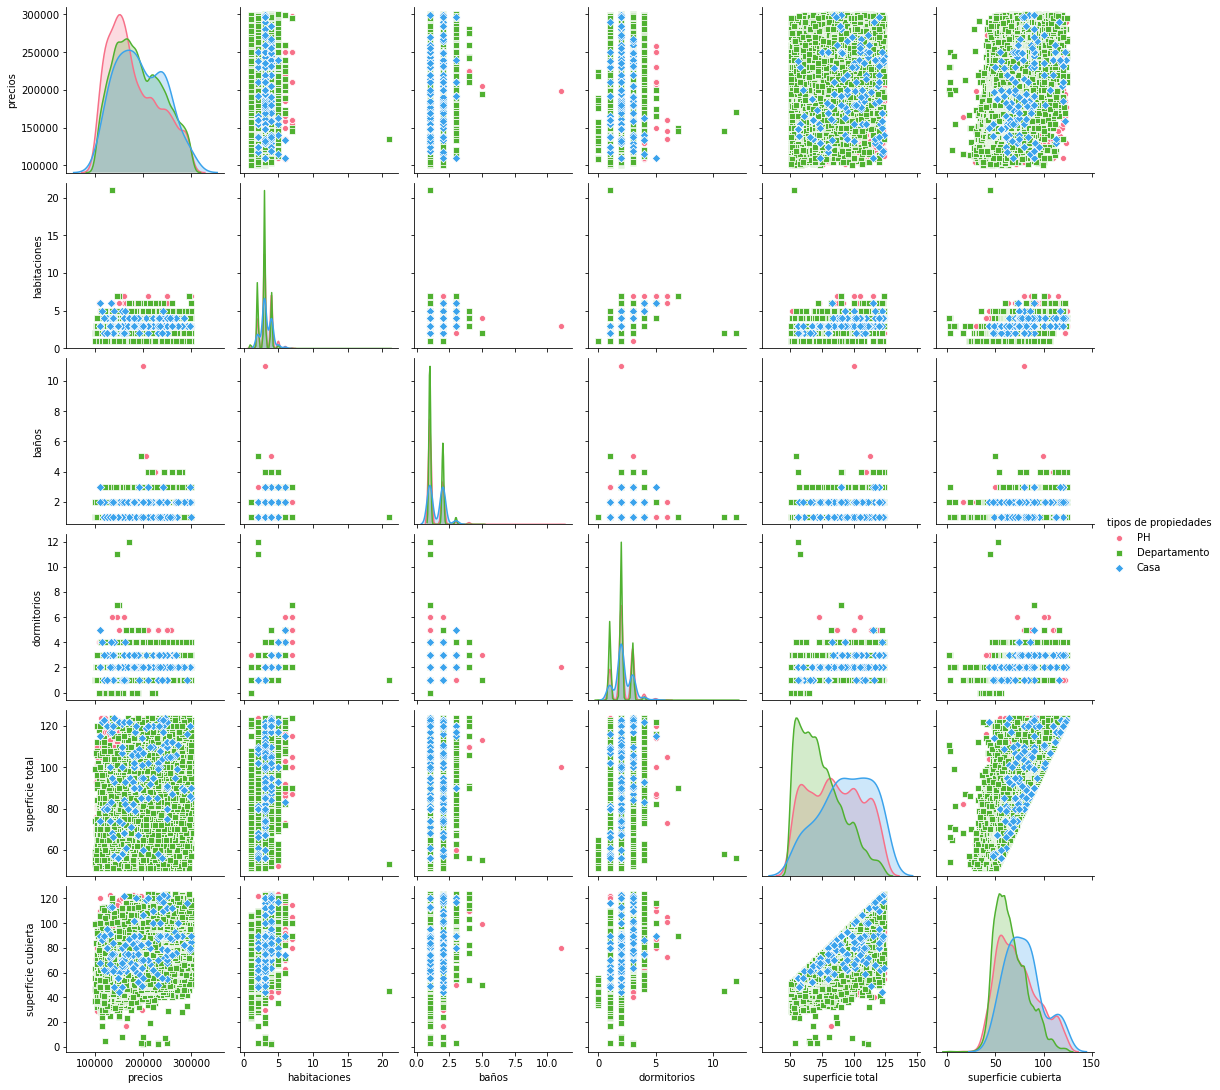

In [86]:
sns.pairplot(data = data_D, hue='tipos de propiedades', palette="husl", markers=["o", "s", "D"])

En este gráfico se dificulta identificar las correlaciones entre variables. Veamos a traves de un heatmap si se puede identificar mejor las correlaciones entre las variables

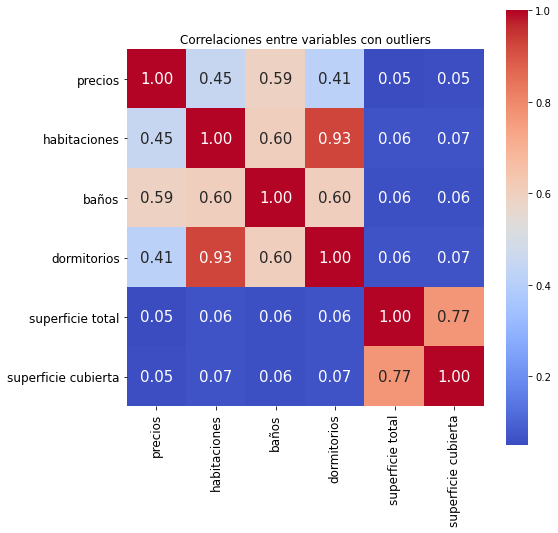

In [87]:
corr = data_A.corr()
plt.figure(figsize=(8,8))
sns.heatmap(corr,cbar = True,  square = True, annot=True,fmt= '.2f',annot_kws={'size': 15},
           cmap= 'coolwarm')
plt.title("Correlaciones entre variables con outliers",fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

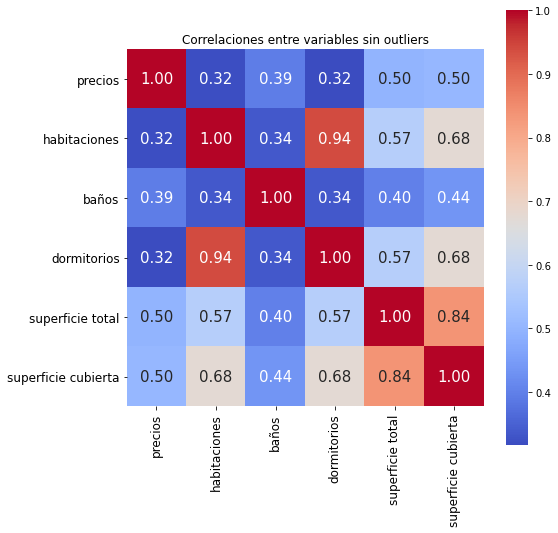

In [88]:
corr = data_D.corr()
plt.figure(figsize=(8,8))
sns.heatmap(corr,cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           cmap= 'coolwarm')
plt.title("Correlaciones entre variables sin outliers",fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

***Conclusiones del análisis de correlaciones***

A través de un heatmap se facilita la comprehensión de la correlación entre las variables. Debido a los outliers presentes en el gráfico 1 que nos dificultan un análisis claro de los datos, realizamos una filtración de los datos con el objetivo de observar claramente las correlaciones entre las variables sin esos outliers.

Una vez eliminados esos outliers, se pudo identificar que la variable precio tiene una gran correlación con la superficie total y la superficie descubierta del inmueble, seguida de la cantidad de baños que posee y luego en menor medida con la cantidad de habitaciones y dormitorios. 

En el grafico que incluye los outliers, estas correlaciones no se podian identificar claramente ya que debido a aquellos inmueble muy pequeños o de gran tamaño que afectaban el correcto análisis del mismo, es por eso que en aquel gráfico no se podia identificar las correlaciones entre precio y cubierta total y descubierta.Solamente se podia identificar la correlacion con las cantidades de baños, habitaciones y dormitorios presentes en los inmuebles. b***

### 2.1 Desafío

***Desafio*** - ¿Cuál es el barrio con las propiedades más baratas de Buenos Aires?

In [89]:
data_desafio = data_prop.loc[(data_prop['superficie total'] < 112) & 
                             (data_prop['superficie total']>10) & (data_prop['superficie total'] >= data_prop['superficie cubierta']) &
                             (data_prop['precios'] < 110000)] 

In [90]:
data_desafio.head(5)

,país,región,latitud,longitud,barrio,precios,habitaciones,baños,dormitorios,superficie total,superficie cubierta,tipos de propiedades,fecha de inicio,fecha de finalización,creación,moneda,titulo,descripción,tipo de operación
4,Argentina,Bs.As. G.B.A. Zona Sur,-34.914194,-57.938219,La Plata,40000.0,2.0,1.0,1.0,50.0,35.0,PH,2019-10-17,2020-03-11,2019-10-17,USD,58 entre 1 y 2 Venta de departamento en ph.1 ...,58 entre 1 y 2 Venta de departamento en PH. P...,Venta
8,Argentina,Capital Federal,-34.639598,-58.419612,Parque Patricios,89000.0,1.0,1.0,1.0,45.0,37.0,PH,2019-10-17,2019-12-23,2019-10-17,USD,"PH SIN EXPENSAS, AMPLIO MONOAMBIENTE DIVISIBLE...","VENTA DE PH, EN EXCELENTE ESTADO, EN PARQUE PA...",Venta
9,Argentina,Capital Federal,-34.639598,-58.419612,Parque Patricios,89000.0,1.0,1.0,1.0,45.0,37.0,PH,2019-10-17,2019-12-23,2019-10-17,USD,"PH SIN EXPENSAS, AMPLIO MONOAMBIENTE DIVISIBLE...","VENTA DE PH, EN EXCELENTE ESTADO, EN PARQUE PA...",Venta
13,Argentina,Bs.As. G.B.A. Zona Norte,-34.545990,-58.859357,Pilar,45000.0,1.0,1.0,1.0,50.0,35.0,Departamento,2019-10-17,2019-11-30,2019-10-17,USD,Monoambiente con cochera en Boca Ratón. Oportu...,"Departamento monoambiente muy luminoso, impeca...",Venta
14,Argentina,Bs.As. G.B.A. Zona Norte,-34.452861,-58.898987,Pilar,35000.0,1.0,1.0,1.0,32.0,32.0,Departamento,2019-10-17,2019-12-23,2019-10-17,USD,Monoambiente en Pilar con amenities. Anticipo ...,Boutique Pilar es un desarrollo inmobiliario c...,Venta


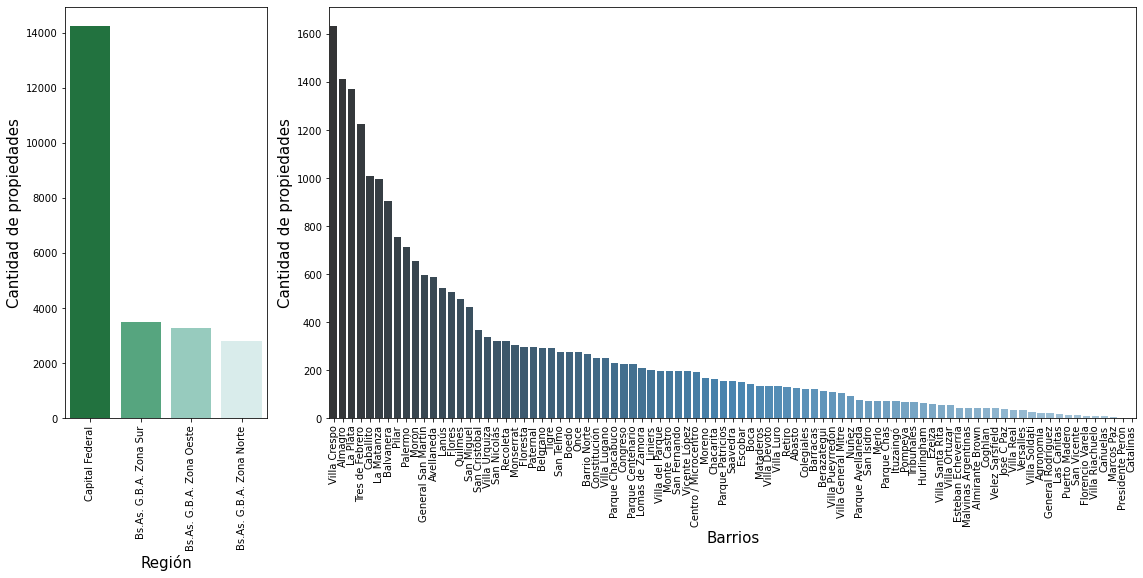

In [91]:
from matplotlib import gridspec
fig = plt.figure(figsize=(16,14))
gs = gridspec.GridSpec(2, 2, width_ratios=[1, 4])
plt.subplot(gs[0])
ax = sns.countplot(x = 'región', data= data_desafio, palette = 'BuGn_r',
                  order= data_desafio['región'].value_counts().index)
plt.ylabel('Cantidad de propiedades',fontsize=15);
plt.xlabel('Región',fontsize=15);
for item in ax.get_xticklabels():
       item.set_rotation(90)
plt.subplot(gs[1])
ax2 = sns.countplot(x = 'barrio', data= data_desafio, palette= 'Blues_d',
                   order= data_desafio['barrio'].value_counts().index)
plt.ylabel('Cantidad de propiedades', fontsize=15);
plt.xlabel('Barrios',fontsize=15);
for item in ax2.get_xticklabels():
       item.set_rotation(90)
plt.tight_layout()
plt.show()

***Análisis del Desafio***

A través de este análisis se pudo identificar que aquellos inmuebles de menor precio se encuentran en primer medida en Capital Federal, seguido de Zona Sur y luego de Zona Oeste. 
Este resultado tiene sentido ya que los barrios cuyos precios son los más bajos coinciden con aquellos barrios en donde se encuentran los niveles adquisitos más bajos de la ciudad de Buenos Aires como por ejemplo Villa crespo, Amagro, La plata, 3 de Febrero, La matanza, Flores, Once,Lanús, entre otros)

Se pueden encontrar algunas excepciones como el barrio de Recoleta, Belgrano, Barrio Norte, Nuñez, que no son barrios en donde se encuentran niveles adquisitos bajos, pero en la mayoria el analisis coincide con aquellas zona donde se encuentran los niveles socio-económicos más bajos de la ciudad, 

### 3. Machine Learning

En esta sección, debes entrenar dos modelos de Machine Learning - uno de vecinos más cercanos y otro de árboles de decisión -  para predecir el precio de las propiedades tipo `Departamento`, `PH` y `Casa`  en la Ciudad Autónoma de Buenos Aires (`Capital Federal`). Para ello, no debes olvidarte de:

* Elegir una métrica apropiada para evaluar los resultados de los modelos.
* Seleccionar las variables predictoras (`X`) y la variable a predecir (`y`). 
* Realizar un Train/Test split de los datos.
* Generar un modelo *benchmark* y evaluarlo.
* Entrenar un modelo de vecinos más cercanos y un modelo de árbol de decisión con hiperparámetros iniciales de su elección.
* Evaluar los modelos obtenidos. Para ello, evalúa la métrica elegida en el conjunto de Test y en el conjunto de Train. También, realiza gráficos de valores reales vs. valores predichos.
* Mejorar el desempeño de sus modelos optimizando el número de vecinos y la profundidad del árbol, respectivamente.
* Entre los modelos entrenados, ¿cuál elegirías para utilizar?¿Por qué? 
* Ser **crítico/a** con la metodología utilizada. Por ejemplo, responde las siguientes preguntas: ¿Qué información no estás usando que podría ayudar al modelo?¿Qué información puede estar demás o repetida?

Estos lineamientos corresponden al **mínimo entregable** de esta sección.


**Importante:** para asegurarnos que trabajes con un dataset apropiados, debes volver a cargar los datos y realizar el siguiente filtrado:

1. Selecciona aquellas propiedades en Capital Federal y cuyo tipo de propiedad es Departamento, PH o Casa.
1. Selecciona aquellas propiedades cuya superficie total es menor a 1000 m2 y mayor a 15 m2.
1. Selecciona aquellas propiedades cuya precio es menor 4000000 dólares.
1. Selecciona las columnas `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered` y `price`.
1. Descarta aquellas instacias con valores faltantes.

**Checkpoint:** deberías obtener un dataset con 81019 instacias y 6 columnas.

----

# FILTRAMOS EL DATASET

Filtramos el Dataset por propiedades en Capital Federal y que cuyo tipo de propiedad sea Departamento, PH o Casa. También filtramos por las propiedades cuya superficie total sea menor a 1000 m2 y mayor a 15 mts. Por último, filtramos el Dataset por aquellas propiedades cuyo precio sea menor a 4000000 dólares

In [92]:
data_modelos=data_prop.loc[ (data_prop['región'] == 'Capital Federal') & 
                           ((data_prop['tipos de propiedades'] == 'PH') | (data_prop['tipos de propiedades'] == 'Casa') | (data_prop['tipos de propiedades'] == 'Departamento')) &
                          (data_prop['superficie total'] <= 1000 ) & (data_prop['superficie total'] >= 15 ) &
                          (data_prop['precios'] <= 4000000 )]

In [93]:
data_modelos.shape

(82373, 19)

***Filtramos el Dataset seleccionando las columnas `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered` y `price`*** 

In [94]:
data_modelos=pd.DataFrame(data_modelos,columns=['habitaciones','dormitorios','baños','superficie total','superficie cubierta','precios'])

In [95]:
data_modelos.shape

(82373, 6)

***Filtramos el Dataset descartando aquellas instacias con valores faltantes***

In [96]:
data_modelos=data_modelos.dropna(how='any',axis=0)

In [97]:
data_modelos.shape

(81019, 6)

In [98]:
data_modelos.head()

,habitaciones,dormitorios,baños,superficie total,superficie cubierta,precios
0,7.0,7.0,2.0,140.0,140.0,153000.0
1,2.0,1.0,2.0,70.0,58.0,159000.0
2,2.0,1.0,1.0,45.0,45.0,125000.0
3,2.0,1.0,1.0,85.0,50.0,295000.0
5,2.0,1.0,1.0,56.0,56.0,150000.0


---

# MÉTRICA DE EVALUACIÓN

Luego de análizar las diferentes métricas de evaluación existentes para evaluar un modelo de regresión, llegamos a la conclusión de que utilizaremos la métrica error cuadrático medio (RMSE) para evaluar la exactitud predictiva de los modelos utlizados. 

Decidimos utilizar esta métrica debido a que si bien es una métrica sensible a la presencia de outliers, hemos filtrado nuestro dataset y preprocesado los valores atípicos presentes en él por lo que los outliers ya no afectaran a la métrica de evaluación elegida. Además, la ventaja de esta métrica en comparación del error absoluto medio (MAE) es que es más fácil calcular el gradiente y al estar el error al cuadrado se pueden identificar mejor los errores más grandes por lo que los modelos ahora pueden enfocarse más en los errores más grandes que en los pequeños.

A través de esta métrica se espera identificar que modelo posee un mejor desempeño en base a cuál  posee un RMSE menor, es decir, cuánto menor sea el RMSE en el modelo, mejor será el modelo utilizado.

---

# IMPLEMENTAMOS LOS MODELOS

En este punto implementaremos 2 modelos, árbol de decisión y vecinos más cercanos con el fin de identificar que modelo tuvo un mejor desempeño.

In [99]:
from sklearn.metrics import accuracy_score , plot_confusion_matrix , confusion_matrix

In [100]:
from sklearn.metrics import mean_squared_error, r2_score

In [101]:
X = data_modelos.drop("precios", axis=1)
y = data_modelos.precios

***Casos Benchmark (Comparación)***

In [102]:
y_mean = data_modelos.precios.mean()

In [103]:
print(y_mean)

263772.52554339106


In [104]:
y_pred = [y_mean]*len(data_modelos)

In [105]:
print(r2_score(y, y_pred))

0.0


In [106]:
print(mean_squared_error(y, y_pred))

89369913707.6502


A través de este análisis podemos observar que comparando la media del valor de los precios y los valores reales de los precios de los inmuebles, el error cuadrático medio es muy alto ya que el valor de la media es muy distinto a cada valor real de los precios presentes en el dataset.

---

# ENTRENAMIENTO DE LOS MODELOS Y EVALUACIÓN

In [107]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [108]:
print('Proporcion de etiquetas positiva en los datos de Train: ', y_train.sum()/y_train.size)
print('Proporcion de etiquetas positiva en los datos de Test: ', y_test.sum()/y_test.size)

Proporcion de etiquetas positiva en los datos de Train:  263444.4557311816
Proporcion de etiquetas positiva en los datos de Test:  264438.5795339791


Podemos observar que la proporción de cada etiqueta es parecida, lo que es algo beneficioso a la hora de implementar los modelos ya que se busca que las distribuciones entre ambos conjuntos sean similares.

***Elección de modelos***

In [109]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

clf_tree = DecisionTreeRegressor()
clf_knn = KNeighborsRegressor()

In [110]:
clf_tree.fit(X_train, y_train)
clf_knn.fit(X_train, y_train)

KNeighborsRegressor()

***Optimización de Párametros para vecinos más cercano***

In [111]:
## Definimos las listas vacias para los valores de accuracy deseados
lista_accuracy_train = []
lista_accuracy_test = []

# Definimos la lista de valores de k que vamos a explorar
k_vecinos = [1,2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,50]

# Generamos en loop sobre los distintos valores de k 
for k in k_vecinos:
    
    # Definir el modelo con el valor de vecinos deseado
    clf = KNeighborsRegressor(n_neighbors=k)
    
    # Entrenar el modelo
    clf.fit(X_train,y_train)
    
    # Predecir y evaluar sobre el set de entrenamiento
    y_train_pred = clf.predict(X_train)
    train_acc = mean_squared_error(y_train, y_train_pred)
    
    # Predecir y evaluar sobre el set de evaluación
    y_test_pred = clf.predict(X_test)
    test_acc = mean_squared_error(y_test, y_test_pred)
    
    # Agregar la información a las listas
    lista_accuracy_train.append(train_acc)
    lista_accuracy_test.append(test_acc)

Text(0, 0.5, 'Exactitud')

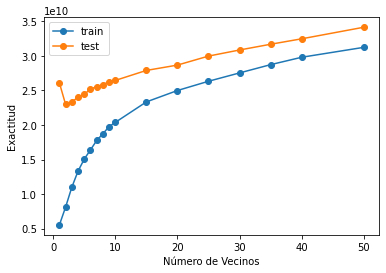

In [112]:
plt.plot(k_vecinos,lista_accuracy_train,'o-',label='train' )
plt.plot(k_vecinos,lista_accuracy_test,'o-',label='test')
plt.legend()
plt.xlabel('Número de Vecinos')
plt.ylabel('Exactitud')

En este gráfico se pueden observar la variación de la exactitud dependiendo del número de vecinos utilizados en el modelo entre el conjunto de entrenamiento y el conjunto de prueba. En función a este gráfico, utilizaremos 40 vecinos para el modelo ya que corresponde a aquel punto donde la exactitud entre el conjunto de entrenamiento y el conjunto de prueba poseen poca diferencia entre si.

***Optimización de Párametros para árbol de decisión***

In [113]:
# Definimos las listas vacias para los valores de accuracy deseados
lista_accuracy_train = []
lista_accuracy_test = []

# Definimos la lista de valores de max_depth que vamos a explorar
max_depths = np.arange(1,20)

# Generamos en loop sobre los distintos valores de profundidad 
for max_depth in max_depths:
    
    # Vamos a repetir el siguiente bloque de código
    
    # Definir el modelo con el valor de profundidad
    clf = DecisionTreeRegressor(max_depth = max_depth, random_state=42)
    
    # Entrenar el modelo
    clf.fit(X_train,y_train)
    
    # Predecir y evaluar sobre el set de entrenamiento
    y_train_pred = clf.predict(X_train)
    train_acc = mean_squared_error(y_train, y_train_pred)
    
    # Predecir y evaluar sobre el set de evaluación
    y_test_pred = clf.predict(X_test)
    test_acc = mean_squared_error(y_test, y_test_pred)
    
    # Agregar la información a las listas
    lista_accuracy_train.append(train_acc)
    lista_accuracy_test.append(test_acc)

Text(0, 0.5, 'Exactitud')

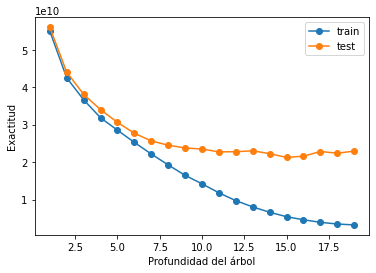

In [114]:
plt.plot(max_depths,lista_accuracy_train,'o-',label='train' )
plt.plot(max_depths,lista_accuracy_test,'o-',label='test')
plt.legend()
plt.xlabel('Profundidad del árbol')
plt.ylabel('Exactitud')

En este gráfico se pueden observar la variación de la exactitud dependiendo de la profundidad del árbol utilizada en el modelo entre el conjunto de entrenamiento y el conjunto de prueba. En función a este gráfico, utilizaremos una profundidad de 2.5 para el modelo ya que corresponde a aquel punto donde la exactitud entre el conjunto de entrenamiento y el conjunto de prueba es casi identica.

# Evaluación del modelo

In [115]:
clf_tree_best = DecisionTreeRegressor(max_depth = 2)
clf_knn_best = KNeighborsRegressor(n_neighbors=40)

clf_tree_best.fit(X_train, y_train)
clf_knn_best.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=40)

In [116]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

**Para el modelo árbol**

In [117]:
y_test_pred = clf_tree_best.predict(X_test)

mean_squared_error(y_test, y_test_pred)

43999441551.9294

**Para el modelo de vecinos**

In [118]:
y_test_pred = clf_knn_best.predict(X_test)

mean_squared_error(y_test, y_test_pred)

32479897410.006546

Modelo: Árbol de Decisión
Raíz del error cuadrático medio en Train: 206129.88064324248
Raíz del error cuadrático medio en Test: 209760.43848144816


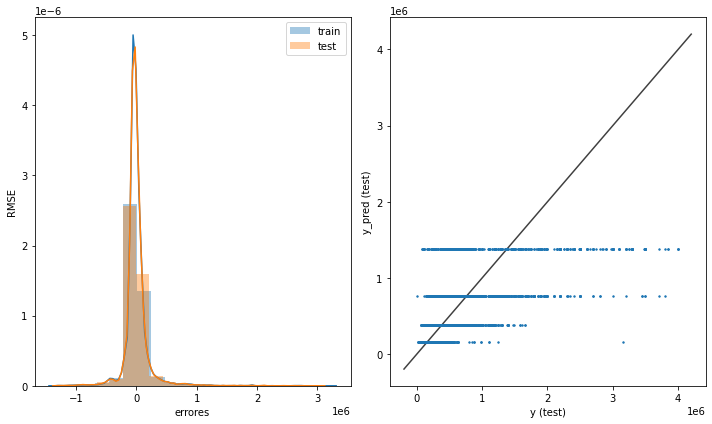

Modelo: Vecinos más cercanos
Raíz del error cuadrático medio en Train: 172649.27112841597
Raíz del error cuadrático medio en Test: 180221.80059583954


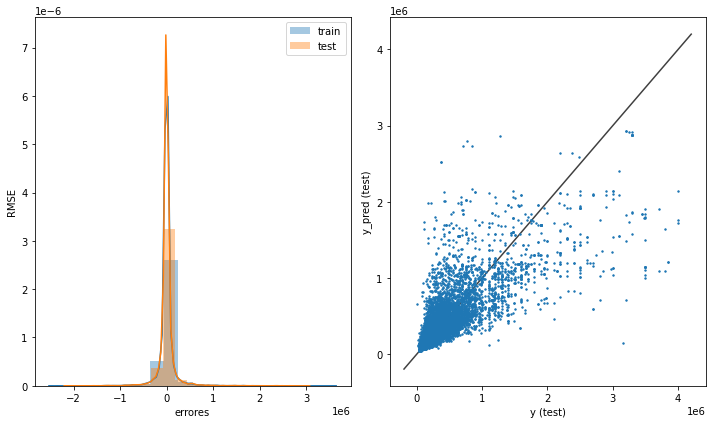

In [119]:
from sklearn.metrics import mean_squared_error
import seaborn as sns
modelos = ['Árbol de Decisión', 'Vecinos más cercanos']

for i, model in enumerate([clf_tree_best, clf_knn_best]):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    
    print(f'Modelo: {modelos[i]}')

    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
    print(f'Raíz del error cuadrático medio en Test: {rmse_test}')
    
    plt.figure(figsize = (10,6))

    plt.subplot(1,2,1)
    sns.distplot(y_train - y_train_pred, bins = 20, label = 'train')
    sns.distplot(y_test - y_test_pred, bins = 20, label = 'test')
    plt.xlabel('errores')
    plt.ylabel('RMSE')
    plt.legend()


    ax = plt.subplot(1,2,2)
    ax.scatter(y_test,y_test_pred, s =2)
    
    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  
    np.max([ax.get_xlim(), ax.get_ylim()]),  
    ]
    
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('y (test)')
    plt.ylabel('y_pred (test)')
    
    plt.tight_layout()
    plt.show()

Una vez analizado el RMSE llegamos a la conclusión de que el modelo cuyo desempeño fue mejor es el de Vecinos más cercanos.

Si bien en el modelo de árbol de decisión, el RMSE entre el conjunto de entrenamiento y de prueba es muy similar, lo que indica que la exactitud entre ambos conjuntos es mejor. Pero por el otro lado, el modelo de vecinos más cercanos nos da un mejor resultado, ya que el RMSE es menor en ambos conjuntos lo que significa que la eficiencia del modelo es mejor que la del árbol de decisión. Aunque los resultados del RMSE en ambos conjuntos no sean casi iguales, la diferencia entre ambos es mínima, es por eso que en base a estos resultados llegamos a la conclusión de que el modelo de vecinos más cercanos posee un mejor desempeño que el de árbol de decisión.

---

# MEJORAS A LA METODOLOGÍA USADA

*añadiendo más variables y logrando un mejor procesamiento de características.

*Ajuste de parámetros del modelo: a través de una optimización de los hiperparámetros.

Para mejorar la metología usada y que las predicciones de los modelos sean más precisas podriamos optar por optimizar los hiperparametros de los mismos. 
Si bien en este proyecto se determinaron los parámetros a tráves de los resultados de una representación gráfica donde analizamos la variación de la exactitud de los modelos entre el set de entrenamiento y el set de prueba en base a diferentes cantidades de vecinos en el modelo de vecinos más cercanos y diferentes profundidades en el modelo de árbol de decisión. Los modelos podrían tener una mejor precisión si optimizaramos los hiperparámetros a través de un "Gridsearch" o "Randomsearch" que nos establezca que parámetro específicamente es el provocaria un mejor desempeño en ellos en base a nuestro dataset con el objetivo de mejorarlos y que sean más eficientes.

Además, considero que para los modelos los datos que faltarian que podrían haber ayudado son las variables de latitud y longitud, ya que si bien filtramos el dataset utilizando solamente propiedades que se encuentren en Capital Federal. 
Dicha región de la ciudad de Buenos Aires es muy extensa y podria haber ayudado a los modelos conocer la ubicación exacta de los inmuebles, ya que dentro de Capital Federal existen zonas de alto poder adquisitivo, medio y bajo.

También, considero que estas variables hubieran ayudado a los modelos a ser más eficiente, ya que a través de los puntos de latitud y longitud se podrian identificar si los inmuebles cuyos precios son más elevados forman parte de aquellos barrios que son identificados por tener un nivel socio-económico elevado como es el caso de Puerto Madero, recoleta o no. Asimismo, a través de la latitud y longitud podriamos agrupar a los diferentes inmuebles en base a su locación y analizar particularmente cada zona y poder determinar cuales son las zonas cuyos precios son más elevados que otras, ya que la ubicación es un factor influyente en el precio de los inmuebles.

***Filtramos el Dataset incluyendo latitud y longitud***

In [58]:
data_anexo=data_prop.loc[ (data_prop['región'] == 'Capital Federal') & 
                           ((data_prop['tipos de propiedades'] == 'PH') | (data_prop['tipos de propiedades'] == 'Casa') | (data_prop['tipos de propiedades'] == 'Departamento')) &
                          (data_prop['superficie total'] <= 1000 ) & (data_prop['superficie total'] >= 15 ) &
                          (data_prop['precios'] <= 4000000 )]
data_anexo.shape

(82373, 19)

In [59]:
data_anexo=pd.DataFrame(data_anexo,columns=['latitud','longitud','habitaciones','dormitorios','baños','superficie total','superficie cubierta','precios'])

In [60]:
data_anexo.shape

(82373, 8)

In [61]:
data_anexo=data_anexo.dropna(how='any',axis=0)

In [62]:
data_anexo.shape

(76771, 8)

In [63]:
data_anexo.head()

,latitud,longitud,habitaciones,dormitorios,baños,superficie total,superficie cubierta,precios
0,-34.605880,-58.384949,7.0,7.0,2.0,140.0,140.0,153000.0
1,-34.624056,-58.412110,2.0,1.0,2.0,70.0,58.0,159000.0
2,-34.593569,-58.427474,2.0,1.0,1.0,45.0,45.0,125000.0
3,-34.581294,-58.436754,2.0,1.0,1.0,85.0,50.0,295000.0
5,-34.593779,-58.441239,2.0,1.0,1.0,56.0,56.0,150000.0


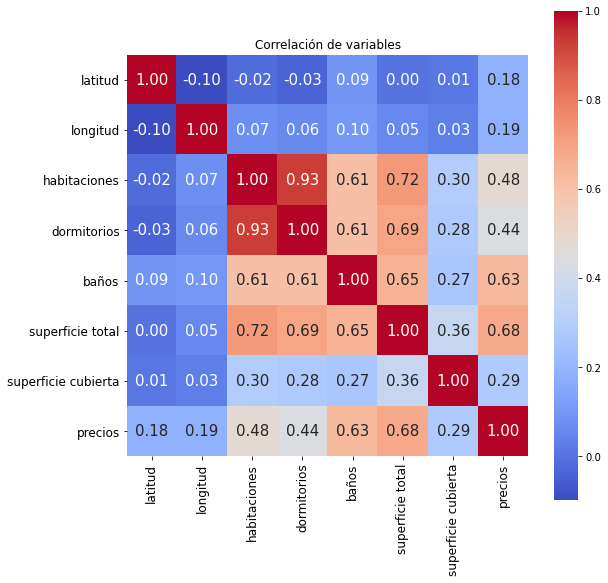

In [64]:
corr = data_anexo.corr()
plt.figure(figsize=(9,9))
sns.heatmap(corr,cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           cmap= 'coolwarm')
plt.title("Correlación de variables",fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

En este heatmap se puede observar que si bien las variables de latitud y longitud no son las más importantes, hubiesen ayudado a los modelos a ser más eficientes, ya que ambas variables poseen una correlación con la variable precio que podria haber sido de ayuda.

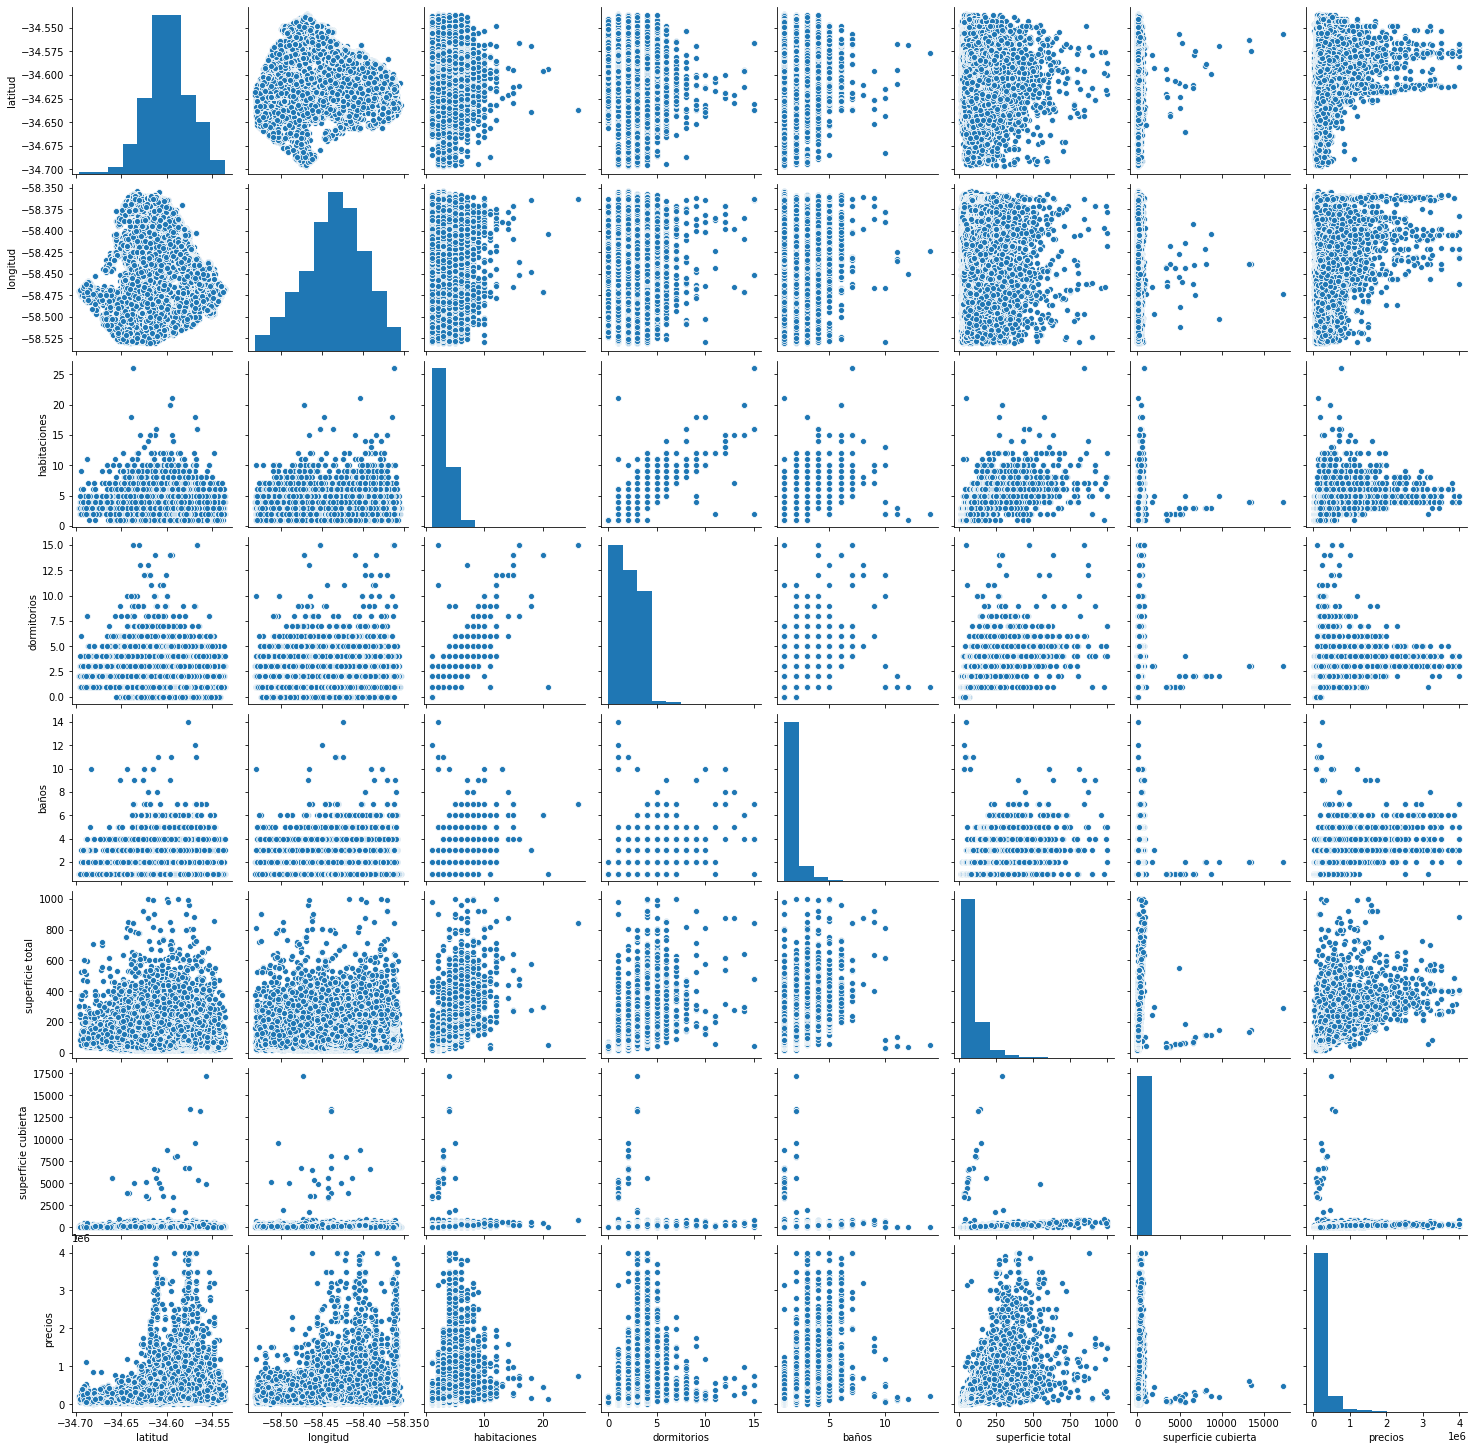

In [65]:
sns.pairplot(data = data_anexo)

En este último gráfico, podemos identificar que las variables de latitud y longitud hubiesen sido de ayuda ya que se puede observar como a través de los distintos puntos de los diferentes inmuebles se va formando la región de Capital Federal, por lo que estas variables hubiesen sido de ayuda a los modelos para poder identificar la ubicación del inmueble, ya sea si se encuentra en una zona donde existe un nivel socio-económico alto, medio o bajo.